# Projekt Grupowy Języki Skryptowe w Analizie Danych - R
Wykonali: **Filip Koźlik**, **Wojciech Kubak**, **Wojciech Harmata** \
**Informatyka NS RMS sem. V**

# Wczytanie i przedstawienie zbioru danych 
**Wojciech Harmata**

**Opis wykorzystanych modułów**:
1. dplyr - filtrowanie informacji na podstawie zbioru daych.
2. RColorBrewer - ustawienie palety barw.
3. tidyverse - wykresy z użyciem modułu ggplot.
4. plyr - heatmapy.

In [101]:
df <- read.csv("insurance.csv", stringsAsFactors = FALSE)

**Przedstawienie zbioru danych**

In [102]:
head(df)

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


**Opis kolumn**:
1. **age** - wiek osoby.
2. **sex** - płeć osoby.
3. **bmi** - body mass index.
4. **children** - czy osoba posiada potomstwo.
5. **smoker** - czy osoba jest palaczem.
6. **region** - region zamieszkania.
7. **charges** - koszt ubezpieczenia zdrowotnego.

In [103]:
colnames(df)

[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "charges"

**Podstawowe informacje o zbiorze danych**

In [104]:
summary(df)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

# Analiza i selekcja zbioru danych

# Analiza palaczy o BMI powyżej 25
**Filip Koźlik**

**Znalezienie palaczy** \
Załadowanie modułu dplyr

In [105]:
library(dplyr)

In [106]:
df_smokers <- filter(df, smoker == "yes")

In [107]:
head(df_smokers)

age,sex,bmi,children,smoker,region,charges
19,female,27.90,0,yes,southwest,16884.92
62,female,26.29,0,yes,southeast,27808.73
27,male,42.13,0,yes,southeast,39611.76
30,male,35.30,0,yes,southwest,36837.47
34,female,31.92,1,yes,northeast,37701.88
31,male,36.30,2,yes,southwest,38711.00


**Palacze, z bmi >= 25**

In [108]:
NORM_BMI <- 25
df_smokers_bmi <- filter(df_smokers, bmi >= NORM_BMI)

In [109]:
head(df_smokers_bmi)

age,sex,bmi,children,smoker,region,charges
19,female,27.90,0,yes,southwest,16884.92
62,female,26.29,0,yes,southeast,27808.73
27,male,42.13,0,yes,southeast,39611.76
30,male,35.30,0,yes,southwest,36837.47
34,female,31.92,1,yes,northeast,37701.88
31,male,36.30,2,yes,southwest,38711.00


**Utworzenie backetów dla kolumny charges**

In [110]:
min_charge <- min(df_smokers_bmi$charges)
max_charge <- max(df_smokers_bmi$charges)

charge_diff <- (max_charge - min_charge)/5
bucket_v <- c()
values <- c(min_charge + charge_diff*1, min_charge + charge_diff*2, min_charge + charge_diff*3, min_charge + charge_diff*4, min_charge + charge_diff*5)
for(i in 1:length(values))
    {
    bucket_v[i] <- values[i]
}

In [111]:
values <- as.numeric(bucket_v)
values

[1] 25168.63 34819.08 44469.53 54119.98 63770.43

In [112]:
b1_count <- count(filter(df_smokers_bmi, charges>values[1] & charges<values[2]))
b2_count <- count(filter(df_smokers_bmi, charges>values[2] & charges<values[3]))
b3_count <- count(filter(df_smokers_bmi, charges>values[3] & charges<values[4]))
b4_count <- count(filter(df_smokers_bmi, charges>values[4] & charges<values[5]))
count_smokers <- c(b1_count, b2_count, b3_count, b4_count)

**Liczba palaczy w konkretnym pojemniku**

In [113]:
count_smokers <- as.numeric(count_smokers)
count_smokers

[1] 31 90 36  5

**Import palety barw**

In [114]:
library("RColorBrewer")

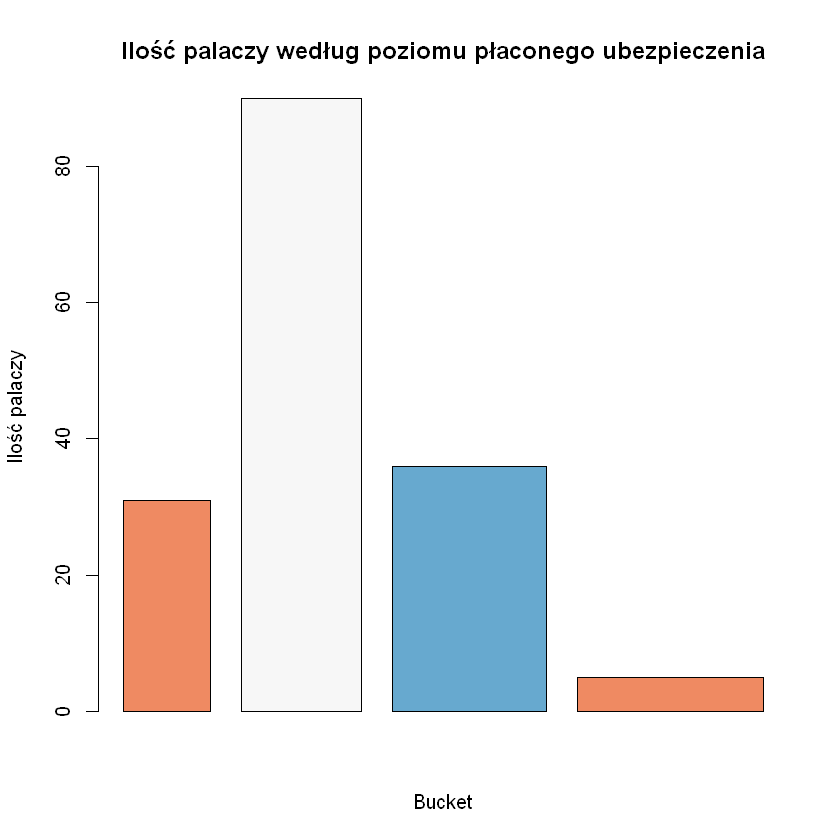

In [115]:
barplot(
    count_smokers,
    values,
    main = "Ilość palaczy według poziomu płaconego ubezpieczenia",
    ylab = "Ilość palaczy",
    xlab = "Bucket",
    col  = brewer.pal(n = 3, name = "RdBu")
)

# Najdroższe 10 ubezpieczeń
**Wojciech Harmata**

In [116]:
sorted_df <- head(df[order(df$charges, decreasing=TRUE), ], 10)
sorted_df

,age,sex,bmi,children,smoker,region,charges
544,54,female,47.410,0,yes,southeast,63770.43
1301,45,male,30.360,0,yes,southeast,62592.87
1231,52,male,34.485,3,yes,northwest,60021.40
578,31,female,38.095,1,yes,northeast,58571.07
820,33,female,35.530,0,yes,northwest,55135.40
1147,60,male,32.800,0,yes,southwest,52590.83
35,28,male,36.400,1,yes,southwest,51194.56
1242,64,male,36.960,2,yes,southeast,49577.66
1063,59,male,41.140,1,yes,southeast,48970.25
489,44,female,38.060,0,yes,southeast,48885.14


**Agregacja pod względem płci**

In [117]:
sex_aggregation <- aggregate(
    sorted_df[,c(1,3,4,7)],
    by = list(sorted_df$sex),
    FUN = "mean"
    )
colnames(sex_aggregation) <- c("sex",colnames(sorted_df[,c(1,3,4,7)]))

In [118]:
sex_aggregation

sex,age,bmi,children,charges
female,40.50000,39.77375,0.250000,56590.51
male,51.33333,35.35750,1.166667,54157.93


# Średnia wysokość ubezpieczenia względem wieku
**Filip Koźlik**

In [119]:
age_aggregation <- aggregate(
    df[ ,7],
    by = list(df$age),
    FUN = "mean"
)
colnames(age_aggregation) <- c("age", "mean_of_charges")

In [120]:
head(age_aggregation)

age,mean_of_charges
18,7086.218
19,9747.909
20,10159.698
21,4730.464
22,10012.933
23,12419.820


**Załączenie modułu tidyverse**

In [121]:
library(tidyverse)

**Wykres średniej kwoty ubezpieczenia od wieku i prostej regresji**

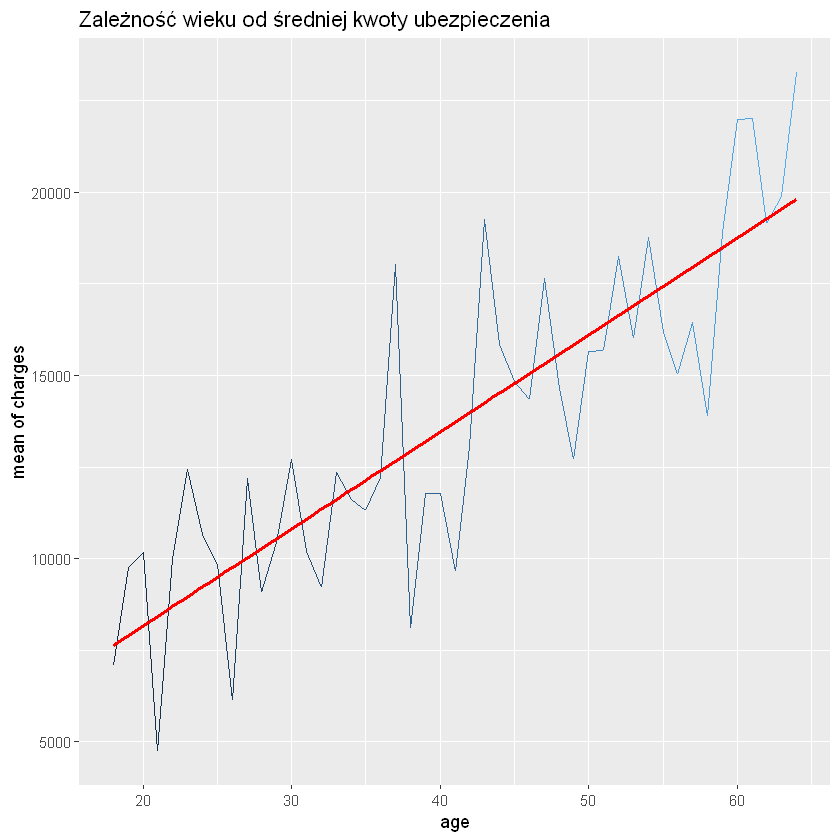

In [122]:
plot = ggplot(age_aggregation, aes(age_aggregation[,1],age_aggregation[,2], color=age_aggregation$age)) 
plot + geom_line() + labs(title="Zależność wieku od średniej kwoty ubezpieczenia", x="age", y="mean of charges") +
geom_smooth(color = "red", method = "lm", se = FALSE) + theme(legend.position = "none")

# Średnie BMI względem wieku

In [123]:
bmi_aggregation <- aggregate(
    df[,3],
    by = list(df$age),
    FUN = "mean"
)
colnames(bmi_aggregation) <- c("age", "average_bmi")

In [124]:
head(bmi_aggregation)

age,average_bmi
18,31.32616
19,28.59691
20,30.63276
21,28.18571
22,31.08768
23,31.45446


**Wykres średniej wartości BMI względem wieku**

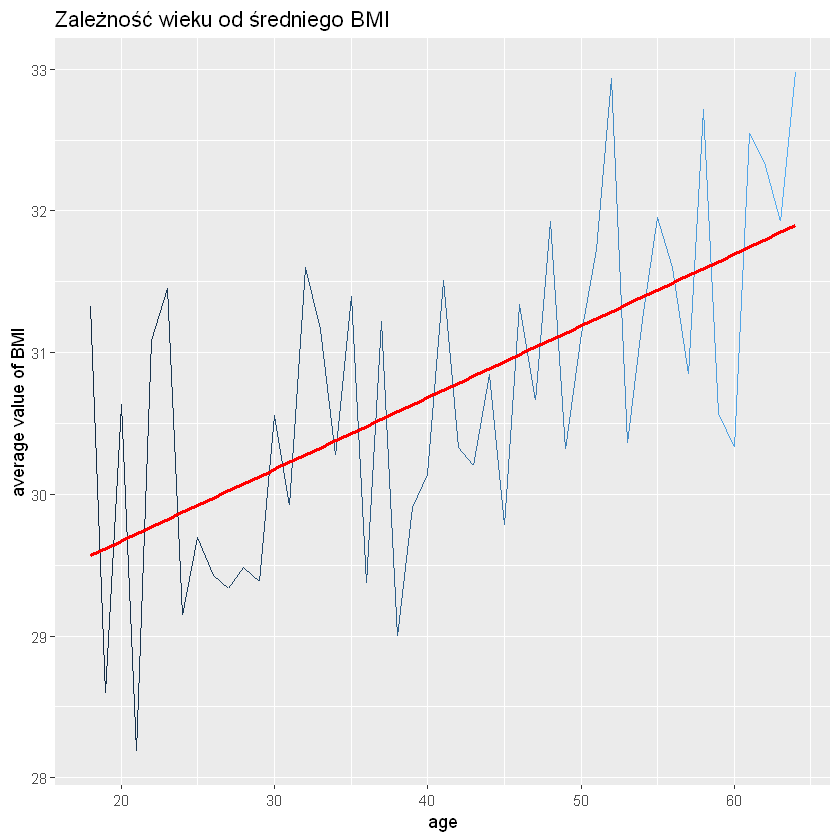

In [125]:
plot = ggplot(bmi_aggregation, aes(bmi_aggregation[,1],bmi_aggregation[,2], color=bmi_aggregation$age)) 
plot + geom_line() + labs(title="Zależność wieku od średniego BMI", x="age", y="average value of BMI") +
geom_smooth(color = "red", method = "lm", se = FALSE) + theme(legend.position = "none")

# **Średnia ilość posiadanych dzieci względem wieku**
**Wojciech Kubak**

**Agregacja danych**

In [126]:
child_age_aggregation <- aggregate(
    df[,4],
    by = list(df$age),
    FUN = "mean"
)
colnames(child_age_aggregation) <- c("age", "average amount of having kids")
head(child_age_aggregation)

age,average amount of having kids
18,0.4492754
19,0.4264706
20,0.8620690
21,0.7857143
22,0.7142857
23,1.0000000


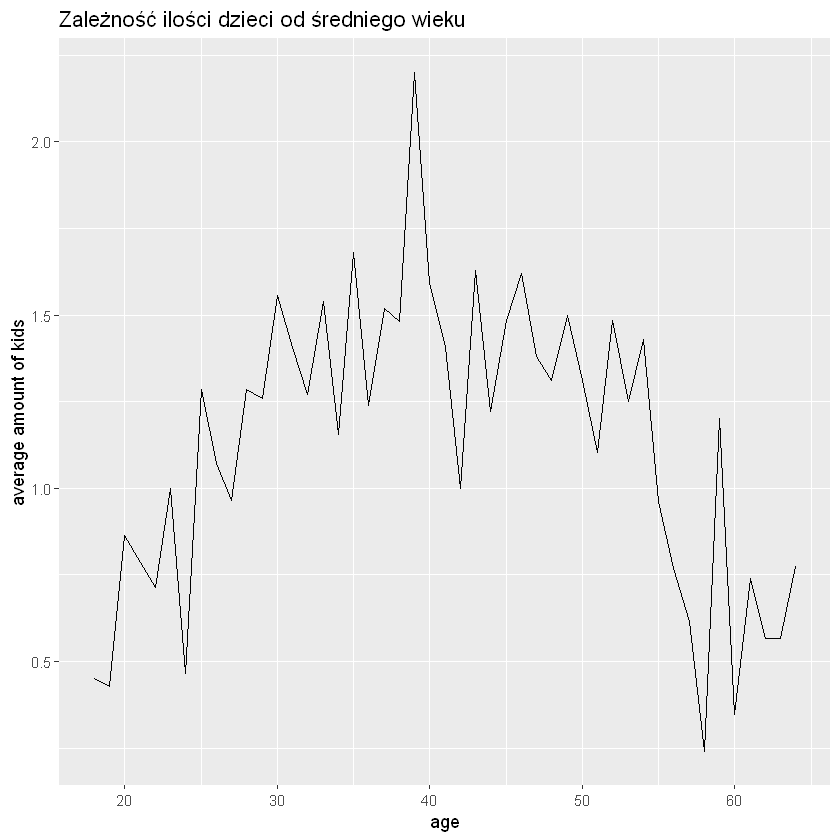

In [127]:
plot = ggplot(child_age_aggregation, aes(child_age_aggregation[,1],child_age_aggregation[,2])) 
plot + geom_line() + labs(title="Zależność ilości dzieci od średniego wieku", x="age", y="average amount of kids") +
theme(legend.position = "none")

# Heatmapa korelacji zmiennych
**Wojciech Kubak**

In [154]:
library(dplyr)
require(plyr)

In [163]:
df_corr <- df

**Mapowanie wartości tekstowych na liczbowe**

In [164]:
df_corr$sex <- mapvalues(df_corr$sex, from = c('female','male'), to = c(0,1))
df_corr$smoker <- mapvalues(df_corr$smoker, from = c('no','yes'), to = c(0,1))

df_corr <- df_corr[, c(1:5,7)]

**Zmiana typu kolumny**

In [165]:
df_corr$sex <- as.numeric(df_corr$sex)
df_corr$smoker <- as.numeric(df_corr$smoker)

In [166]:
summary(df_corr)

      age             sex              bmi           children    
 Min.   :18.00   Min.   :0.0000   Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   1st Qu.:0.0000   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Median :1.0000   Median :30.40   Median :1.000  
 Mean   :39.21   Mean   :0.5052   Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00   3rd Qu.:1.0000   3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00   Max.   :1.0000   Max.   :53.13   Max.   :5.000  
     smoker          charges     
 Min.   :0.0000   Min.   : 1122  
 1st Qu.:0.0000   1st Qu.: 4740  
 Median :0.0000   Median : 9382  
 Mean   :0.2048   Mean   :13270  
 3rd Qu.:0.0000   3rd Qu.:16640  
 Max.   :1.0000   Max.   :63770  

In [168]:
head(df_corr)

age,sex,bmi,children,smoker,charges
19,0,27.900,0,1,16884.924
18,1,33.770,1,0,1725.552
28,1,33.000,3,0,4449.462
33,1,22.705,0,0,21984.471
32,1,28.880,0,0,3866.855
31,0,25.740,0,0,3756.622


In [169]:
cormat <- round(cor(df_corr),2)

In [170]:
cormat

,age,sex,bmi,children,smoker,charges
age,1.00,-0.02,0.11,0.04,-0.03,0.30
sex,-0.02,1.00,0.05,0.02,0.08,0.06
bmi,0.11,0.05,1.00,0.01,0.00,0.20
children,0.04,0.02,0.01,1.00,0.01,0.07
smoker,-0.03,0.08,0.00,0.01,1.00,0.79
charges,0.30,0.06,0.20,0.07,0.79,1.00


In [171]:
library(reshape2)
melted_cormat <- melt(cormat)
head(melted_cormat)


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



Var1,Var2,value
age,age,1.00
sex,age,-0.02
bmi,age,0.11
children,age,0.04
smoker,age,-0.03
charges,age,0.30


**Utworzenie heatmapy z pomocą modułu ggplot2**

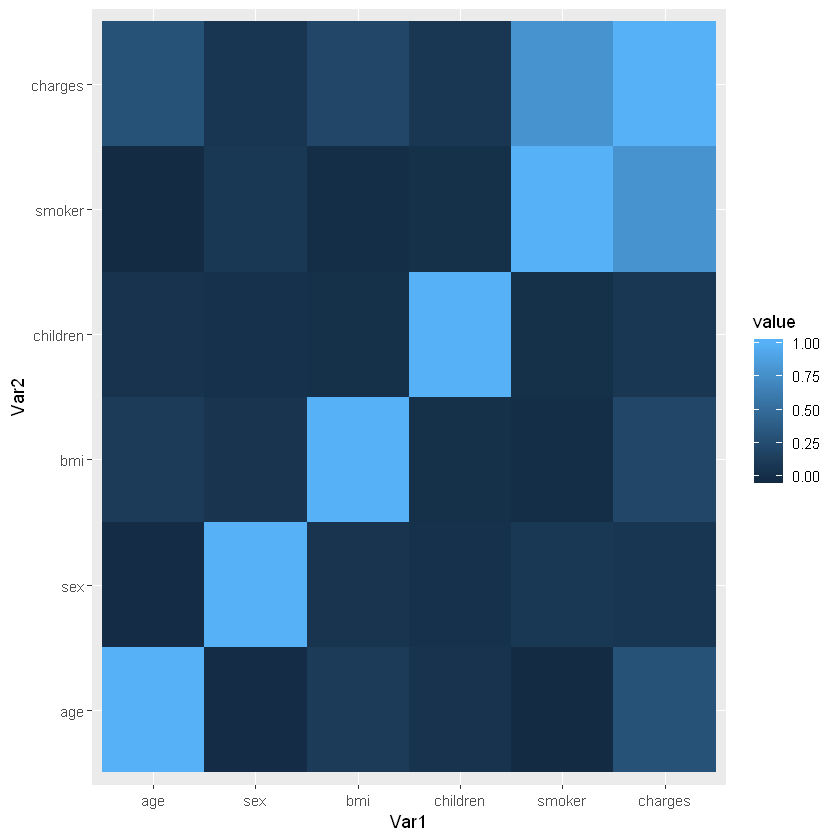

In [172]:
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()